### Ryan Woodworth 500752821 & Kaushal Desai 500770614
                                                                                         
 December 15th, 2019

# Predicting cars by model, brand, and class using simple classifiers and CNNs

To load data without errors, please extract the data.zip file, place the notebook within the extracted folder labelled data, open notebook. As long as the notebook is in the same folder as the individual folders within data, the data will import without error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
##Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Classify between two very different car models

In [3]:
#First we try to classify between 2 very different cars. Different model, brand, shape, type.

#import data in 1 batch, normalize values for better processing
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest',
    
)


train_data = datagen.flow_from_directory((os.getcwd() + '/cars_temp/train'),
                                              batch_size=87,
                                              target_size=(250, 250),
                                              classes=['Lamborghini Aventador Coupe 2012','Land Rover Range Rover SUV 2012'],
                                          class_mode='binary')

test_data = datagen.flow_from_directory((os.getcwd() + '/cars_temp/test'),
                                              batch_size=87,
                                              target_size=(250, 250),
                                              classes=['Lamborghini Aventador Coupe 2012','Land Rover Range Rover SUV 2012'],
                                          class_mode='binary')

#First and only batch
a = next(train_data)
b = next(test_data)

Found 87 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [4]:
#Split data and target classes
x_train = a[0]
y_train = a[1]
legend_train = train_data.class_indices #Dictionary for classes
keys_train = list(legend_train.keys()) #List of Class names

x_test = b[0]
y_test = b[1]
legend_test = test_data.class_indices
keys_test = list(legend_test.keys())

In [5]:
keys_test

['Lamborghini Aventador Coupe 2012', 'Land Rover Range Rover SUV 2012']

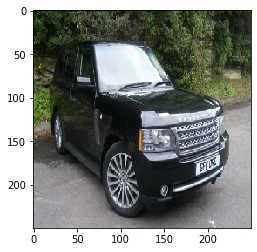

Land Rover Range Rover SUV 2012


In [6]:
#Show sample of imported data
sampleindex = np.random.randint(0,87)
sample = x_train[sampleindex, :]

plt.imshow(sample)
plt.show()
print(keys_train[int(y_train[sampleindex])]) #Print prediction name instead of value

Number of mislabeled points out of a total 85 points : 20
Prediction Accuracy:
 0.7647058823529411


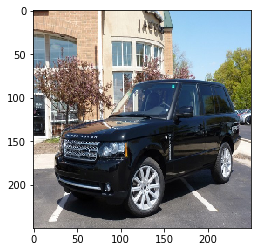

Actual Label: Land Rover Range Rover SUV 2012
Predicted Label: Land Rover Range Rover SUV 2012


In [8]:
from sklearn.naive_bayes import GaussianNB
#x_train_r = x_train.reshape(x_train.shape[0],67500)
#x_test_r = x_test.reshape(x_test.shape[0],67500)

x_train_r = x_train.reshape(x_train.shape[0],187500)
x_test_r = x_test.reshape(x_test.shape[0],187500)

bays = GaussianNB()
bays.fit(x_train_r,y_train)
prediction_nb = bays.predict(x_test_r)
print("Number of mislabeled points out of a total %d points : %d" % (y_test.shape[0], np.sum(y_test != prediction_nb)) )
print("Prediction Accuracy:\n", bays.score(x_test_r, y_test))

#Visualize Sample with label and prediction
sampleindex = np.random.randint(0,85)
sample = x_test[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Actual Label: %s' % keys_test[int(y_test[sampleindex])]) #Find actual label from assigned key 
print('Predicted Label: %s' % keys_test[int(prediction_nb[sampleindex])]) #Find predicted label in legend from assigned key

As one can see, even though each image is subject to a lot of noise and the cars are not the only object within the image, the Naive Bayes classifier is able to predict between a Lamborghini and a Range Rover, two very different looking cars. The next step is to see if a simple classifier such as Naive Bayes is capable of determining between upwards of 150 classes of cars, some of which may look similar or be of the same brand or type.

# Classify between 48 different models of cars
# Warning:
### The data for this section was too large to upload to d2l, if it is necessary for you to run this section yourself, please contact me at rwoodworth@ryerson.ca and I can either send you the data or can deliver a physical copy

In [9]:
train_data_multi = datagen.flow_from_directory((os.getcwd() + '/car_data/car_data/train'),
                                              batch_size=100,
                                              target_size=(250, 250),
                                          class_mode='binary')

test_data_multi = datagen.flow_from_directory((os.getcwd() + '/car_data/car_data/test'),
                                              batch_size=100,
                                              target_size=(250, 250),
                                          class_mode='binary')

train_iter = next(train_data_multi)
test_iter = next(test_data_multi)

#Split data and target classes
x_train_multi = train_iter[0]
y_train_multi = train_iter[1]
legend_train_multi = train_data_multi.class_indices
keys_train_multi = list(legend_train_multi.keys())

x_test_multi = test_iter[0]
y_test_multi = test_iter[1]
legend_test_multi = test_data_multi.class_indices
keys_test_multi = list(legend_test_multi.keys())

Found 1970 images belonging to 48 classes.
Found 1944 images belonging to 48 classes.


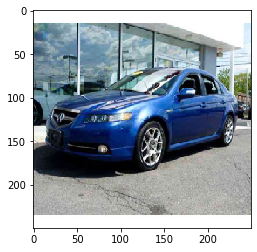

Acura TL Type-S 2008


In [10]:
#Sample image from 1 of the 196 classes; First batch only

sampleindex = np.random.randint(0,100)
sample = x_train_multi[sampleindex, :]

plt.imshow(sample)
plt.show()
print(keys_train_multi[int(y_train_multi[sampleindex])])

In [11]:
#Train NB model in batches
bays_m = GaussianNB()
for i in range(len(train_data_multi)):
    batch = train_data_multi[i]
    x = batch[0]
    y = batch[1]
    x = x.reshape(x.shape[0], 187500)
    bays_m.partial_fit(x, y,list(legend_train_multi.values()) )
    


Number of mislabeled points out of a total 100 points : 96
Prediction Accuracy:
 0.03


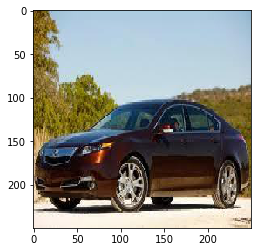

Actual Label: Acura TL Sedan 2012
Predicted Label: Audi A5 Coupe 2012


In [12]:
x_train_r_multi = x_train_multi.reshape(x_train_multi.shape[0],187500)
x_test_r_multi = x_test_multi.reshape(x_test_multi.shape[0],187500)

#Predict against created model and a single target/label batch
prediction_nb_m = bays_m.predict(x_train_r_multi)
print("Number of mislabeled points out of a total %d points : %d" % (y_test_multi.shape[0], np.sum(y_test_multi != prediction_nb_m)) )
print("Prediction Accuracy:\n", bays_m.score(x_test_r_multi, y_test_multi))

#Visualize Sample with label and prediction
sampleindex = np.random.randint(0,100)
sample = x_test_multi[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Actual Label: %s' % keys_test_multi[int(y_test_multi[sampleindex])])
print('Predicted Label: %s' % keys_test_multi[int(prediction_nb_m[sampleindex])])

While the naive bayes classifier worked well with an accuracy of 76%, when the amount of classes is increased the classifier performs much worse and provides a classification accuracy of <10% (Testing was only done on one batch so this is only an approximation. Now we are going to relabel the data, making the groupings a little bit more general, and we are going to try predicting just the brand of the car instead of the specific model. 

# Classify between 5 car brands

Found 1780 images belonging to 5 classes.
Found 1758 images belonging to 5 classes.


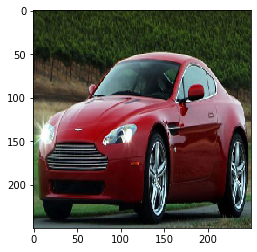

Brand: Aston Martin


In [13]:
brands_train_data = datagen.flow_from_directory((os.getcwd() + '/car_brands/car_brands_train'),
                                              batch_size=100,
                                              target_size=(250, 250),
                                              classes=['Acura','Aston Martin', 'Audi','BMW','Mercedes'],
                                          class_mode='binary')

brands_test_data = datagen.flow_from_directory((os.getcwd() + '/car_brands/car_brands_test'),
                                              batch_size=100,
                                              target_size=(250, 250),
                                              classes=['Acura','Aston Martin', 'Audi','BMW','Mercedes'],
                                          class_mode='binary')

train_iter_brands = next(brands_train_data)
test_iter_brands = next(brands_test_data)

#Split data and target classes
x_train_brands = train_iter_brands[0]
y_train_brands = train_iter_brands[1]
legend_train_brands = brands_train_data.class_indices
keys_train_brands = list(legend_train_brands.keys())

x_test_brands = test_iter_brands[0]
y_test_brands = test_iter_brands[1]
legend_test_brands = brands_test_data.class_indices
keys_test_brands = list(legend_test_brands.keys())

sampleindex = np.random.randint(0,100)
sample = x_train_brands[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Brand: %s' % keys_train_brands[int(y_train_brands[sampleindex])])

Number of mislabeled points out of a total 100 points : 80
Prediction Accuracy:
 0.29


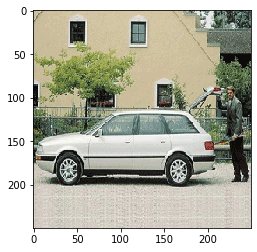

Actual Label: Audi
Predicted Label: Acura


In [14]:
#Train NB model in batches
bays_brands = GaussianNB()
for i in range(len(brands_train_data)):
    batch = brands_train_data[i]
    x = batch[0]
    y = batch[1]
    x = x.reshape(x.shape[0], 187500)
    bays_brands.partial_fit(x, y,list(legend_train_brands.values()) )

x_train_r_brands = x_train_brands.reshape(x_train_brands.shape[0],187500)
x_test_r_brands = x_test_brands.reshape(x_test_brands.shape[0],187500)

#Predict against created model and a single target/label batch
prediction_nb_brands = bays_brands.predict(x_train_r_brands)
print("Number of mislabeled points out of a total %d points : %d" % (y_test_brands.shape[0], np.sum(y_test_brands != prediction_nb_brands)) )
print("Prediction Accuracy:\n", bays_brands.score(x_test_r_brands, y_test_brands))

#Visualize Sample with label and prediction
sampleindex = np.random.randint(0,100)
sample = x_test_brands[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Actual Label: %s' % keys_test_brands[int(y_test_brands[sampleindex])])
print('Predicted Label: %s' % keys_test_brands[int(prediction_nb_brands[sampleindex])])

We would expect to receive better results when predicting only the brand of the car however we still only acheived a prediction accuracy of approximately 30%.

Found 1929 images belonging to 5 classes.
Found 1903 images belonging to 5 classes.


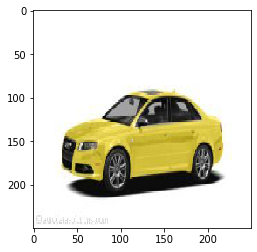

Type: sedan


In [21]:
types_train_data = datagen.flow_from_directory((os.getcwd() + '/car_type/car_type_train'),
                                              batch_size=100,
                                              target_size=(250, 250),
                                              classes=['convertible','coupe','hatchback','sedan','suv'],
                                          class_mode='binary')

types_test_data = datagen.flow_from_directory((os.getcwd() + '/car_type/car_type_test'),
                                              batch_size=100,
                                              target_size=(250, 250),
                                              classes=['convertible','coupe','hatchback','sedan','suv'],
                                          class_mode='binary')

train_iter_types = next(types_train_data)
test_iter_types = next(types_test_data)

#Split data and target classes
x_train_types = train_iter_types[0]
y_train_types = train_iter_types[1]
legend_train_types = types_train_data.class_indices
keys_train_types = list(legend_train_types.keys())

x_test_types = test_iter_types[0]
y_test_types = test_iter_types[1]
legend_test_types = types_test_data.class_indices
keys_test_types = list(legend_test_types.keys())

sampleindex = np.random.randint(0,100)
sample = x_train_types[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Type: %s' % keys_train_types[int(y_train_types[sampleindex])])

Number of mislabeled points out of a total 100 points : 84
Prediction Accuracy:
 0.2


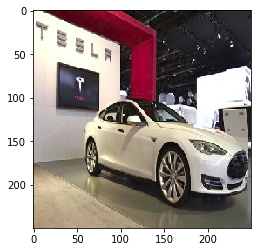

Actual Label: sedan
Predicted Label: convertible


In [20]:
bays_types = GaussianNB()
for i in range(len(types_train_data)):
    batch = types_train_data[i]
    x = batch[0]
    y = batch[1]
    x = x.reshape(x.shape[0], 187500)
    bays_types.partial_fit(x, y,list(legend_train_types.values()) )

x_train_r_types = x_train_types.reshape(x_train_types.shape[0],187500)
x_test_r_types = x_test_types.reshape(x_test_types.shape[0],187500)

#Predict against created model and a single target/label batch
prediction_nb_types = bays_types.predict(x_train_r_types)
print("Number of mislabeled points out of a total %d points : %d" % (y_test_types.shape[0], np.sum(y_test_types != prediction_nb_types)) )
print("Prediction Accuracy:\n", bays_types.score(x_test_r_types, y_test_types))

#Visualize Sample with label and prediction
sampleindex = np.random.randint(0,100)
sample = x_test_types[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Actual Label: %s' % keys_test_types[int(y_test_types[sampleindex])])
print('Predicted Label: %s' % keys_test_types[int(prediction_nb_types[sampleindex])])

Even when the data is reclassified by type instead of by brand, the naive bayes classifier is unable to acheive a prediction accuracy greater than 30%. It appears that this data is too noisy/complex for the naive bayes classifier. In the hopes of successfully predicting information regarding cars from images, we are next going to attempt to implement a convolutional neural network, or CNN, as this type of neural network works especially well with image data.

Now we will see how successful a CNN is when classifying this data:

Found 1929 images belonging to 5 classes.
Found 1903 images belonging to 5 classes.


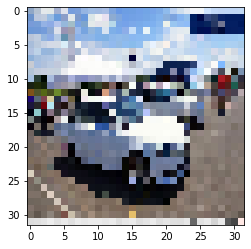

Type: sedan


In [22]:
types_train_data = datagen.flow_from_directory((os.getcwd() + '/car_type/car_type_train'),
                                              batch_size=100,
                                              target_size=(32, 32),
                                              classes=['convertible','coupe','hatchback','sedan','suv'],
                                          class_mode='binary')

types_test_data = datagen.flow_from_directory((os.getcwd() + '/car_type/car_type_test'),
                                              batch_size=100,
                                              target_size=(32, 32),
                                              classes=['convertible','coupe','hatchback','sedan','suv'],
                                          class_mode='binary')

train_iter_types = next(types_train_data)
test_iter_types = next(types_test_data)

#Split data and target classes
x_train_types = train_iter_types[0]
y_train_types = train_iter_types[1]
legend_train_types = types_train_data.class_indices
keys_train_types = list(legend_train_types.keys())

x_test_types = test_iter_types[0]
y_test_types = test_iter_types[1]
legend_test_types = types_test_data.class_indices
keys_test_types = list(legend_test_types.keys())

sampleindex = np.random.randint(0,100)
sample = x_train_types[sampleindex, :]

plt.imshow(sample)
plt.show()
print('Type: %s' % keys_train_types[int(y_train_types[sampleindex])])

In [16]:
from tensorflow.keras import datasets, layers, models

In [17]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model = cnn.fit_generator(types_train_data, epochs=50, 
                    validation_data=types_test_data)

Epoch 1/50
20/20 [==============================] - 36s 2s/step - loss: 1.7442 - accuracy: 0.3427 - val_loss: 1.4893 - val_accuracy: 0.2291
Epoch 2/50
20/20 [==============================] - 25s 1s/step - loss: 1.4520 - accuracy: 0.3815 - val_loss: 1.4185 - val_accuracy: 0.3883
Epoch 3/50
20/20 [==============================] - 23s 1s/step - loss: 1.4461 - accuracy: 0.3883 - val_loss: 1.4580 - val_accuracy: 0.2254
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 1.4468 - accuracy: 0.3650 - val_loss: 1.4157 - val_accuracy: 0.3883
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 1.4333 - accuracy: 0.4007 - val_loss: 1.3991 - val_accuracy: 0.4146
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 1.4064 - accuracy: 0.4282 - val_loss: 1.4045 - val_accuracy: 0.4178
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 1.4065 - accuracy: 0.4235 - val_loss: 1.4141 - val_accuracy: 0.4151
Epoch 8/50
20/20 [==

Text(0, 0.5, 'Accuracy')

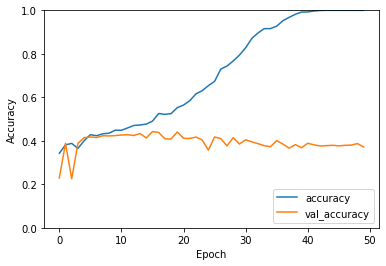

In [20]:
plt.plot(model.history['accuracy'], label='accuracy')
plt.plot(model.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [21]:
test_loss, test_acc = cnn.evaluate_generator(types_test_data,verbose=2)
print(test_loss)
print(test_acc)

20/20 - 20s - loss: 3.4244 - accuracy: 0.3715
3.4243631243705748
0.37151864
